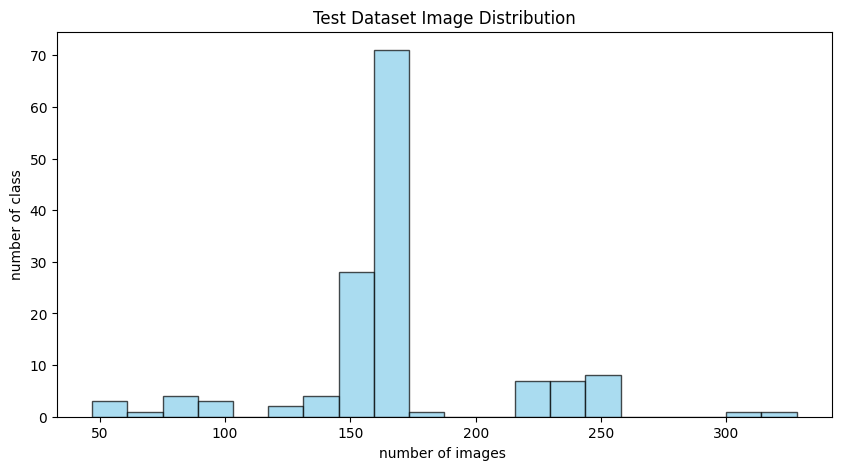

In [6]:
import os
import matplotlib.pyplot as plt

dataset_path = "fruits-360/whole/val"

image_counts = []
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path): 
        num_images = len([f for f in os.listdir(category_path) if f.lower().endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif'))])
        image_counts.append(num_images)

plt.figure(figsize=(10, 5))
plt.hist(image_counts, bins=20, color='skyblue', edgecolor='black', alpha=0.7)

plt.xlabel("number of images ")
plt.ylabel("number of class")
plt.title("Test Dataset Image Distribution")
plt.show()


In [2]:
import os
import random
import shutil

def split_dataset(src_root, dst_root, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1, valid_exts=None):
    if valid_exts is None:
        valid_exts = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']
    
    for split in ['train', 'val', 'test']:
        split_dir = os.path.join(dst_root, split)
        if not os.path.exists(split_dir):
            os.makedirs(split_dir)
    
    for category in os.listdir(src_root):
        category_path = os.path.join(src_root, category)
        if not os.path.isdir(category_path):
            continue
        
        files = [f for f in os.listdir(category_path)
                 if os.path.splitext(f)[1].lower() in valid_exts]
        
        random.shuffle(files)  
        total = len(files)
        train_count = int(total * train_ratio)
        val_count = int(total * val_ratio)
        test_count = int(total * test_ratio)
        
        train_files = files[:train_count]
        val_files = files[train_count:train_count + val_count]
        test_files = files[train_count + val_count:]
        
        for split, file_list in zip(['train', 'val', 'test'], [train_files, val_files, test_files]):
            dst_category_dir = os.path.join(dst_root, split, category)
            if not os.path.exists(dst_category_dir):
                os.makedirs(dst_category_dir)
            
            for file_name in file_list:
                src_file = os.path.join(category_path, file_name)
                dst_file = os.path.join(dst_category_dir, file_name)
                shutil.copy2(src_file, dst_file)
        
        print(f"category '{category}': total {total} , train{train_count},val{val_count}, test{test_count} ")


src_dataset = "fruits-360/whole/val"            
dst_dataset = "pretrain/40%"     

split_dataset(src_dataset, dst_dataset, train_ratio=0, val_ratio=0, test_ratio=1)


类别 'Corn 1': 总共 150 张, 训练集 0 张, 验证集 0 张, 测试集 150 张
类别 'Pear Williams 1': 总共 166 张, 训练集 0 张, 验证集 0 张, 测试集 166 张
类别 'Onion Red Peeled 1': 总共 155 张, 训练集 0 张, 验证集 0 张, 测试集 155 张
类别 'Pepper Green 1': 总共 148 张, 训练集 0 张, 验证集 0 张, 测试集 148 张
类别 'Tangelo 1': 总共 166 张, 训练集 0 张, 验证集 0 张, 测试集 166 张
类别 'Salak 1': 总共 162 张, 训练集 0 张, 验证集 0 张, 测试集 162 张
类别 'Mango 1': 总共 166 张, 训练集 0 张, 验证集 0 张, 测试集 166 张
类别 'Pear 2': 总共 232 张, 训练集 0 张, 验证集 0 张, 测试集 232 张
类别 'Corn Husk 1': 总共 154 张, 训练集 0 张, 验证集 0 张, 测试集 154 张
类别 'Peach 2': 总共 246 张, 训练集 0 张, 验证集 0 张, 测试集 246 张
类别 'Potato Red Washed 1': 总共 151 张, 训练集 0 张, 验证集 0 张, 测试集 151 张
类别 'Cherry Wax Yellow 1': 总共 164 张, 训练集 0 张, 验证集 0 张, 测试集 164 张
类别 'Pear Kaiser 1': 总共 102 张, 训练集 0 张, 验证集 0 张, 测试集 102 张
类别 'Limes 1': 总共 166 张, 训练集 0 张, 验证集 0 张, 测试集 166 张
类别 'Blueberry 1': 总共 154 张, 训练集 0 张, 验证集 0 张, 测试集 154 张
类别 'Apple Golden 1': 总共 160 张, 训练集 0 张, 验证集 0 张, 测试集 160 张
类别 'Apple Red 1': 总共 164 张, 训练集 0 张, 验证集 0 张, 测试集 164 张
类别 'Pear Monster 1': 总共 166 张, 训练集 0 张, 验

In [2]:
import os
import shutil

def clear_and_delete_folder(folder_path):
    
    if os.path.exists(folder_path):
        for item in os.listdir(folder_path):
            item_path = os.path.join(folder_path, item)
            try:
                if os.path.isfile(item_path) or os.path.islink(item_path):
                    os.unlink(item_path)  
                    print(f"delete：{item_path}")
                elif os.path.isdir(item_path):
                    shutil.rmtree(item_path)  
                    print(f"delete：{item_path}")
            except Exception as e:
                print(f"failed {item_path} : {e}")
       
        try:
            os.rmdir(folder_path)
            print(f"delete：{folder_path}")
        except Exception as e:
            print(f"failed {folder_path}: {e}")
    else:
        print("not exist")

folder_path = "pretrain/60%" 
clear_and_delete_folder(folder_path)


已删除文件夹：pretrain/60%/.ipynb_checkpoints
已删除文件夹：pretrain/60%/train
已删除文件夹：pretrain/60%/finetune
已删除空文件夹：pretrain/60%
